In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt

In [4]:
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                images.append(img.flatten())
                labels.append(label)
            else:
                print(f"Skipping image due to loading error: {img_path}")
    return images, labels

In [10]:
healthy_images, healthy_labels = load_images(r"C:\\Projects\\plant_detection\\dataset\Apple___healthy\\Apple___healthy", "healthy")
cedar_rust_images, cedar_rust_labels = load_images(r"C:\\Projects\\plant_detection\dataset\\Apple___Cedar_apple_rust\\Apple___Cedar_apple_rust", "cedar_apple_rust")
apple_scab_images, apple_scab_labels = load_images(r"C:\\Projects\\plant_detection\dataset\\Apple___Apple_scab\\Apple___Apple_scab", "apple_scab")
black_rot_images, black_rot_labels = load_images(r"C:\\Projects\\plant_detection\dataset\\Apple___Black_rot\\Apple___Black_rot", "black_rot")

In [11]:
all_images = np.concatenate((healthy_images, cedar_rust_images, apple_scab_images, black_rot_images), axis=0)
all_labels = np.concatenate((healthy_labels, cedar_rust_labels, apple_scab_labels, black_rot_labels), axis=0)

In [12]:
le = LabelEncoder()
all_labels_encoded = le.fit_transform(all_labels)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    np.array(all_images), np.array(all_labels_encoded), test_size=0.1, random_state=42
)


In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
joblib.dump(rf_model, "random_forest_model.joblib")
joblib.dump(le, "label_encoder_rf.pkl")


['label_encoder_rf.pkl']

In [16]:
rf_model = joblib.load("random_forest_model.joblib")
le = joblib.load("label_encoder_rf.pkl")


In [20]:
input_image_path = r"C:\Projects\plant_detection\dataset\Apple___healthy\Apple___healthy\image (6).JPG"


In [21]:
def preprocess_input_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64)) 
    return img.flatten().reshape(1, -1) 

In [22]:
preprocessed_img = preprocess_input_image(input_image_path)


In [23]:
predictions = rf_model.predict(preprocessed_img)


The Predicted Class is healthy


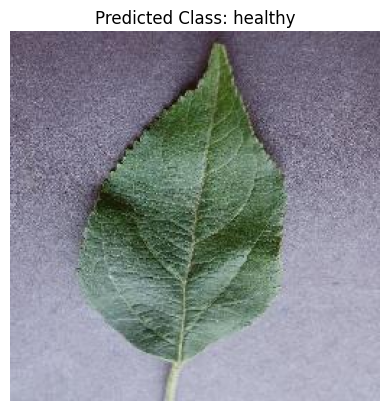

In [24]:
class_label = le.classes_[predictions[0]]

print(f"The Predicted Class is {class_label}")
plt.imshow(cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Class: {class_label}")
plt.axis('off')
plt.show()

In [25]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [26]:
print(f"Test Accuracy: {accuracy * 100:.1f}%")


Test Accuracy: 87.4%
